# Melbourne Housing - Training

The following is an example of investigation and modelling of a regression problem, in this case, predicting the price of houses within the Melbourne area. The same techniques can be used in a classification problem though you would use different algorithms to create the model.

In [2]:
import pandas as pd
#Read the CSV file into a dataframe
melbourne_file_path = 'Datasets/melb_data.csv'
melbourne_origin = pd.read_csv(melbourne_file_path)

#Make a copy of the original data
melbourne_data = melbourne_origin

#The describe function allows you to see information regarding all of the numerical values in the datset 
melbourne_data.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  12211.000000  1.221100e+04  12211.000000  12211.000000  12211.000000   
mean       2.894194  1.063692e+06      9.764368   3103.110638      2.868397   
std        0.959341  6.388613e+05      5.507993     87.359029      0.969456   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.400000e+05      5.900000   3044.000000      2.000000   
50%        3.000000  8.950000e+05      9.200000   3083.000000      3.000000   
75%        3.000000  1.320000e+06     12.600000   3147.000000      3.000000   
max       10.000000  9.000000e+06     47.400000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  12211.000000  12211.000000   12211.000000   6446.000000  7448.000000   
mean       1.517402      1.574073     545.044550    144.222051  1964.605666   
std        0.688923      0.950699    4178.733246    132.838644    37.472441   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     161.000000     90.000000  1940.000000   
50%        1.000000      1.000000     401.000000    124.000000  1970.000000   
75%        2.000000      2.000000     645.000000    170.000000  2000.000000   
max        8.000000     10.000000  433014.000000   6791.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  12211.000000  12211.000000   12211.000000  
mean     -37.809054    144.993148    7452.984358  
std        0.075242      0.098867    4369.616618  
min      -38.182550    144.431810     249.000000  
25%      -37.855600    144.929900    4380.000000  
50%      -37.802200    144.998580    6567.000000  
75%      -37.757735    145.054200   10331.000000  
max      -37.457090    145.526350   21650.000000

In [3]:
#The head function displays the first 5 rows from the dataframe including all of the attributes including categorical data
melbourne_data.head()

Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  03/12/2016       2.5      3067  ...         1    1       202           NaN   
1  04/02/2016       2.5      3067  ...         1    0       156          79.0   
2  04/03/2017       2.5      3067  ...         2    0       134         150.0   
3  04/03/2017       2.5      3067  ...         2    1        94           NaN   
4  04/06/2016       2.5      3067  ...         1    2       120         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0          4019  
1          4019  
2          4019  
3          4019  
4          4019  

[5 rows x 21 columns]

In [4]:
#dtypes displays the datatype for each attribute in the dataframe
melbourne_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

We may also wish to include some of the categorical data (text). In this example we will label encode the remaining categorical attributes by assigning each unique categorical value into a different integer, for example, 'No' = 0, 'Maybe' = 1, 'Yes' = 2, etc. 

In [5]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
melbourne_data= MultiColumnLabelEncoder(columns=['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea',
                                 'Regionname' ]).fit_transform(melbourne_data)

In [6]:
melbourne_data.head()

Suburb           Address  Rooms  Type    Price  Method  SellerG  \
0       0      85 Turner St      2     0  1480000       1       22   
1       0   25 Bloomburg St      2     0  1035000       1       22   
2       0      5 Charles St      3     0  1465000       3       22   
3       0  40 Federation La      3     0   850000       0       22   
4       0       55a Park St      4     0  1600000       4      146   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  03/12/2016       2.5      3067  ...         1    1       202           NaN   
1  04/02/2016       2.5      3067  ...         1    0       156          79.0   
2  04/03/2017       2.5      3067  ...         2    0       134         150.0   
3  04/03/2017       2.5      3067  ...         2    1        94           NaN   
4  04/06/2016       2.5      3067  ...         1    2       120         142.0   

   YearBuilt  CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
0        NaN           31   -37.7996    144.9984           2           4019  
1     1900.0           31   -37.8079    144.9934           2           4019  
2     1900.0           31   -37.8093    144.9944           2           4019  
3        NaN           31   -37.7969    144.9969           2           4019  
4     2014.0           31   -37.8072    144.9941           2           4019  

[5 rows x 21 columns]

As we have a date as an attribute and this should investigated further

In [7]:
#Change the data type for the date from object (text) to DateTime
melbourne_data['Date'] = pd.to_datetime(melbourne_data.Date)

melbourne_data.dtypes

Suburb                    int64
Address                  object
Rooms                     int64
Type                      int64
Price                     int64
Method                    int64
SellerG                   int64
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                       int64
Landsize                  int64
BuildingArea            float64
YearBuilt               float64
CouncilArea               int64
Lattitude               float64
Longtitude              float64
Regionname                int64
Propertycount             int64
dtype: object

The following displays a line graph of comparing date to price

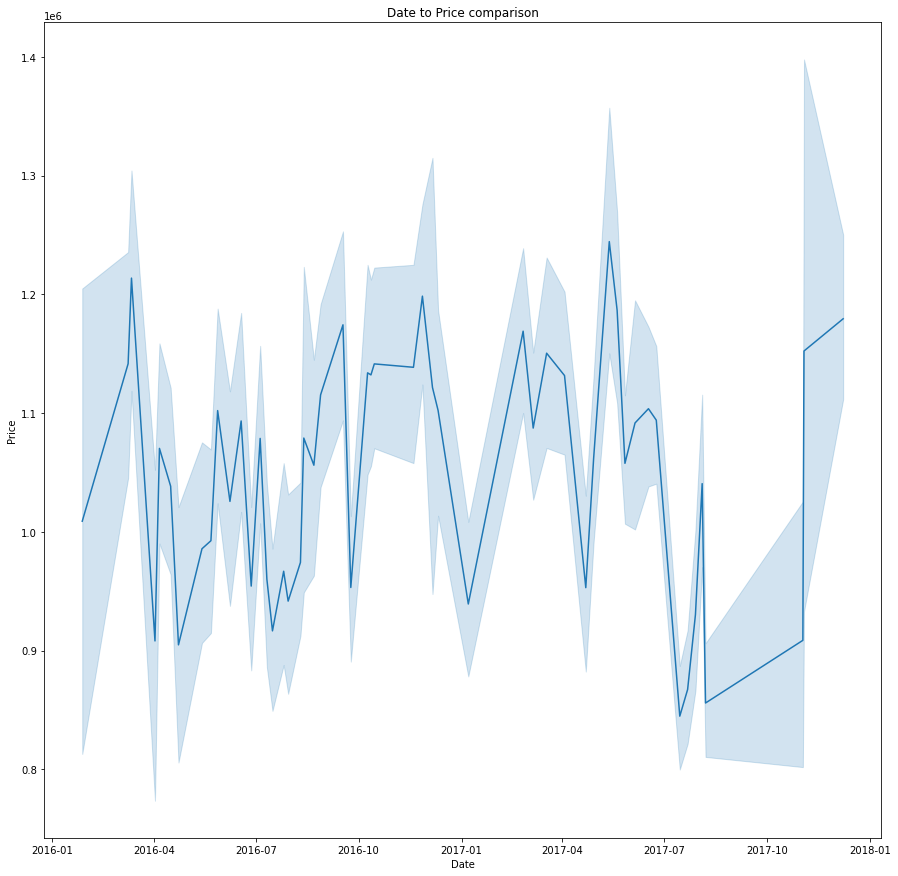

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
plt.title ("Date to Price comparison")
sns.lineplot (x="Date", y="Price", data = melbourne_data)

As house prices can be affected over time it would be worth creating numeric attributes that can be used in the model from those dates. For this model we will extract the month and year of the date.   

In [9]:
import datetime

#Extract the Month and Year into their own attributes from Date
melbourne_data['Date_Month'] = pd.DatetimeIndex(melbourne_data['Date']).month
melbourne_data['Date_Year'] = pd.DatetimeIndex(melbourne_data['Date']).year

#Drop the original Date attribute
melbourne_data = melbourne_data.drop('Date',1)

melbourne_data.describe()

Suburb         Rooms          Type         Price        Method  \
count  12211.000000  12211.000000  12211.000000  1.221100e+04  12211.000000   
mean     152.520514      2.894194      0.570715  1.063692e+06      1.404389   
std       89.000246      0.959341      0.854515  6.388613e+05      1.117471   
min        0.000000      1.000000      0.000000  8.500000e+04      0.000000   
25%       67.000000      2.000000      0.000000  6.400000e+05      1.000000   
50%      153.000000      3.000000      0.000000  8.950000e+05      1.000000   
75%      229.000000      3.000000      1.000000  1.320000e+06      1.000000   
max      307.000000     10.000000      2.000000  9.000000e+06      4.000000   

            SellerG      Distance      Postcode      Bedroom2      Bathroom  \
count  12211.000000  12211.000000  12211.000000  12211.000000  12211.000000   
mean     123.668741      9.764368   3103.110638      2.868397      1.517402   
std       73.079999      5.507993     87.359029      0.969456      0.688923   
min        0.000000      0.000000   3000.000000      0.000000      0.000000   
25%       70.000000      5.900000   3044.000000      2.000000      1.000000   
50%      128.000000      9.200000   3083.000000      3.000000      1.000000   
75%      183.000000     12.600000   3147.000000      3.000000      2.000000   
max      252.000000     47.400000   3977.000000     20.000000      8.000000   

       ...       Landsize  BuildingArea    YearBuilt   CouncilArea  \
count  ...   12211.000000   6446.000000  7448.000000  12211.000000   
mean   ...     545.044550    144.222051  1964.605666     14.767668   
std    ...    4178.733246    132.838644    37.472441      9.834752   
min    ...       0.000000      0.000000  1196.000000      0.000000   
25%    ...     161.000000     90.000000  1940.000000      6.000000   
50%    ...     401.000000    124.000000  1970.000000     16.000000   
75%    ...     645.000000    170.000000  2000.000000     23.000000   
max    ...  433014.000000   6791.000000  2018.000000     32.000000   

          Lattitude    Longtitude    Regionname  Propertycount    Date_Month  \
count  12211.000000  12211.000000  12211.000000   12211.000000  12211.000000   
mean     -37.809054    144.993148      3.800917    7452.984358      6.586520   
std        0.075242      0.098867      2.004398    4369.616618      2.800277   
min      -38.182550    144.431810      0.000000     249.000000      1.000000   
25%      -37.855600    144.929900      2.000000    4380.000000      5.000000   
50%      -37.802200    144.998580      5.000000    6567.000000      6.000000   
75%      -37.757735    145.054200      5.000000   10331.000000      8.000000   
max      -37.457090    145.526350      7.000000   21650.000000     12.000000   

          Date_Year  
count  12211.000000  
mean    2016.481124  
std        0.499664  
min     2016.000000  
25%     2016.000000  
50%     2016.000000  
75%     2017.000000  
max     2017.000000  

[8 rows x 21 columns]

At this point we will drop the 'Address' attributes as these will be unique for each property and we have plenty of attributes including the Lattitude and Longtitude which gives the location of the property.

In [10]:
melbourne_data = melbourne_data.drop('Address',1)

May also want to create new attributes to give even more information that could affect the house price, in this example we calculate the total nuber of rooms in the property and the ratio of rooms to bedrooms. 

In [11]:
melbourne_data["TotalRooms"] = melbourne_data["Rooms"] + melbourne_data["Bedroom2"] + melbourne_data["Bathroom"]
melbourne_data["BedroomsPerRoom"] = melbourne_data["Bedroom2"]  / melbourne_data["TotalRooms"]
melbourne_data.describe()

Suburb         Rooms          Type         Price        Method  \
count  12211.000000  12211.000000  12211.000000  1.221100e+04  12211.000000   
mean     152.520514      2.894194      0.570715  1.063692e+06      1.404389   
std       89.000246      0.959341      0.854515  6.388613e+05      1.117471   
min        0.000000      1.000000      0.000000  8.500000e+04      0.000000   
25%       67.000000      2.000000      0.000000  6.400000e+05      1.000000   
50%      153.000000      3.000000      0.000000  8.950000e+05      1.000000   
75%      229.000000      3.000000      1.000000  1.320000e+06      1.000000   
max      307.000000     10.000000      2.000000  9.000000e+06      4.000000   

            SellerG      Distance      Postcode      Bedroom2      Bathroom  \
count  12211.000000  12211.000000  12211.000000  12211.000000  12211.000000   
mean     123.668741      9.764368   3103.110638      2.868397      1.517402   
std       73.079999      5.507993     87.359029      0.969456      0.688923   
min        0.000000      0.000000   3000.000000      0.000000      0.000000   
25%       70.000000      5.900000   3044.000000      2.000000      1.000000   
50%      128.000000      9.200000   3083.000000      3.000000      1.000000   
75%      183.000000     12.600000   3147.000000      3.000000      2.000000   
max      252.000000     47.400000   3977.000000     20.000000      8.000000   

       ...    YearBuilt   CouncilArea     Lattitude    Longtitude  \
count  ...  7448.000000  12211.000000  12211.000000  12211.000000   
mean   ...  1964.605666     14.767668    -37.809054    144.993148   
std    ...    37.472441      9.834752      0.075242      0.098867   
min    ...  1196.000000      0.000000    -38.182550    144.431810   
25%    ...  1940.000000      6.000000    -37.855600    144.929900   
50%    ...  1970.000000     16.000000    -37.802200    144.998580   
75%    ...  2000.000000     23.000000    -37.757735    145.054200   
max    ...  2018.000000     32.000000    -37.457090    145.526350   

         Regionname  Propertycount    Date_Month     Date_Year    TotalRooms  \
count  12211.000000   12211.000000  12211.000000  12211.000000  12211.000000   
mean       3.800917    7452.984358      6.586520   2016.481124      7.279993   
std        2.004398    4369.616618      2.800277      0.499664      2.374443   
min        0.000000     249.000000      1.000000   2016.000000      2.000000   
25%        2.000000    4380.000000      5.000000   2016.000000      5.000000   
50%        5.000000    6567.000000      6.000000   2016.000000      7.000000   
75%        5.000000   10331.000000      8.000000   2017.000000      8.000000   
max        7.000000   21650.000000     12.000000   2017.000000     24.000000   

       BedroomsPerRoom  
count     12211.000000  
mean          0.392938  
std           0.038874  
min           0.000000  
25%           0.375000  
50%           0.400000  
75%           0.428571  
max           0.833333  

[8 rows x 23 columns]

As the 'YearBuilt' and 'BuildingArea' attributes have significant numbers of missing data (Year Built has a count of 7448 where as there are 12211 items for all other rows) we can either replace missing values with the mean value or remove those attributes. In this example we will remove the both attributes

In [12]:
#The following removes the 'BuildingArea'column
melbourne_data = melbourne_data.drop('BuildingArea', 1)
melbourne_data = melbourne_data.drop('YearBuilt', 1)

#The following checks all columns for missing values and replaces them with the mean value for the column
#melbourne_data= melbourne_data.fillna(melbourne_data.mean())

#melbourne_data.describe()

Draw histogram for each numerical value showing value and qty of that value in the dataframe

<function matplotlib.pyplot.show(*args, **kw)>

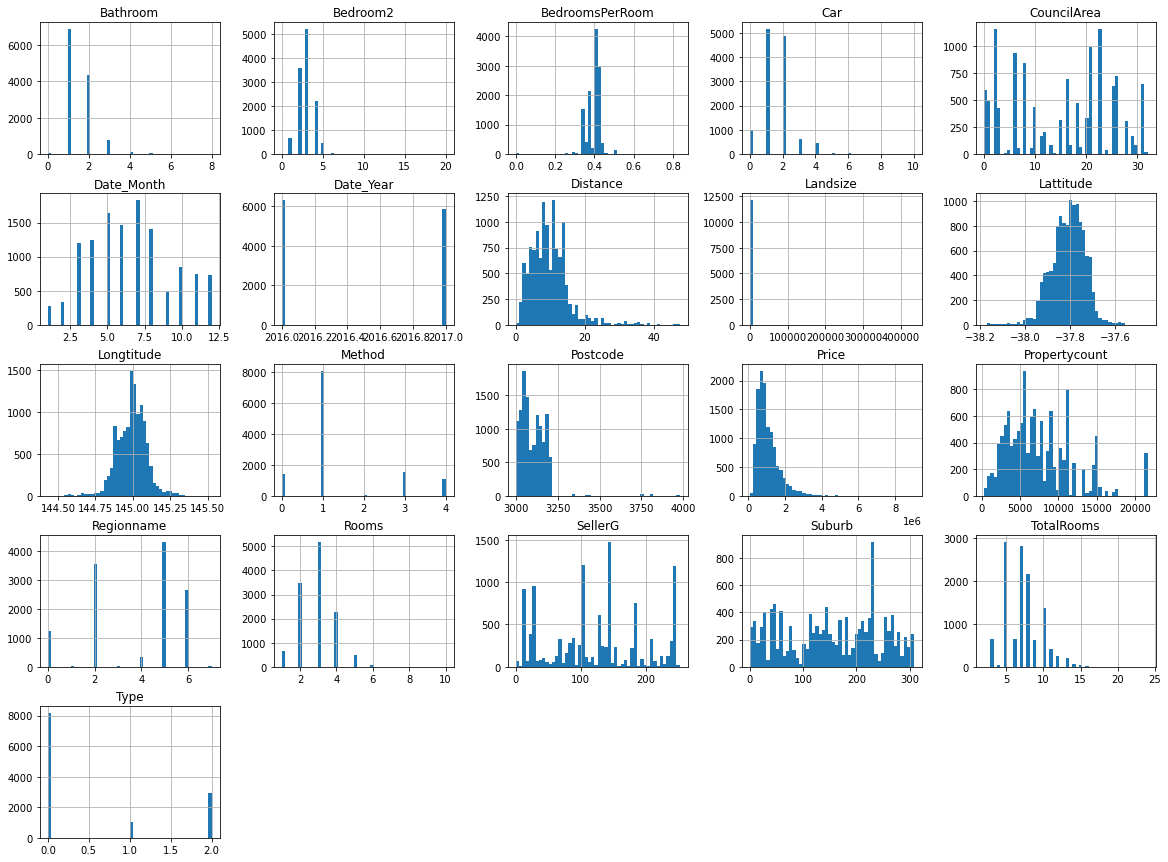

In [13]:
melbourne_data.hist(bins=50, figsize=(20,15))
plt.show

Removing Outliers

In statistics, an outlier is an observation point that is distant from other observations.

Outliers could affect a models accuracy and so you may wish to remove them.

To find outliers you could use various methods, one is the scatter plot. the following example shows a scatter plot, a collection of points that show values for two variables.

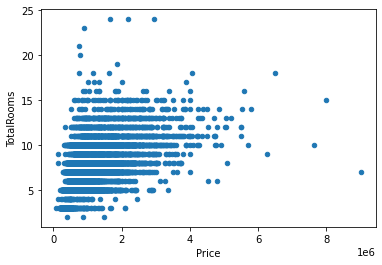

In [14]:
melbourne_data.plot (kind="scatter", x = 'Price', y= 'TotalRooms')

From the plot you can see that most of the data points are between 0 - 15 rooms and a price of $0 - $600,000. Every thing outside of this could be considered an outlier.

One method of finding and removing these outliers is to use the mathematical function Z-Score.

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use Z-score function defined in scipy library to detect the outliers.

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

The following code can be used to check all attributes in the dataset and the remove those outliers

In [15]:
#The shape of the dataframe - rows, columns
melbourne_data.shape

(12211, 21)

In [16]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(melbourne_data))

threshold = 3

melbourne_data = melbourne_data[(z < threshold).all(axis=1)]

In [17]:
melbourne_data.describe()

Suburb         Rooms          Type         Price        Method  \
count  11040.000000  11040.000000  11040.000000  1.104000e+04  11040.000000   
mean     150.306431      2.826087      0.602355  1.028082e+06      1.405163   
std       89.158393      0.903039      0.866814  5.186469e+05      1.118842   
min        0.000000      1.000000      0.000000  8.500000e+04      0.000000   
25%       61.000000      2.000000      0.000000  6.500000e+05      1.000000   
50%      150.000000      3.000000      0.000000  9.000000e+05      1.000000   
75%      227.000000      3.000000      2.000000  1.306000e+06      1.000000   
max      307.000000      5.000000      2.000000  2.980000e+06      4.000000   

            SellerG      Distance      Postcode      Bedroom2      Bathroom  \
count  11040.000000  11040.000000  11040.000000  11040.000000  11040.000000   
mean     122.686141      9.200507   3096.208152      2.808152      1.466395   
std       73.219633      4.500627     60.293851      0.892930      0.607315   
min        0.000000      0.000000   3000.000000      1.000000      0.000000   
25%       70.000000      5.900000   3043.000000      2.000000      1.000000   
50%      128.000000      8.800000   3083.000000      3.000000      1.000000   
75%      181.000000     12.300000   3146.000000      3.000000      2.000000   
max      252.000000     26.100000   3207.000000      5.000000      3.000000   

       ...      Landsize   CouncilArea     Lattitude    Longtitude  \
count  ...  11040.000000  11040.000000  11040.000000  11040.000000   
mean   ...    446.583605     15.061504    -37.809636    144.992224   
std    ...    572.856455      9.794599      0.067572      0.089275   
min    ...      0.000000      0.000000    -38.028480    144.699590   
25%    ...    149.000000      6.000000    -37.855200    144.927875   
50%    ...    364.000000     16.000000    -37.803250    144.996100   
75%    ...    626.250000     23.000000    -37.760900    145.053200   
max    ...  10100.000000     31.000000    -37.585050    145.289150   

         Regionname  Propertycount    Date_Month     Date_Year    TotalRooms  \
count  11040.000000   11040.000000  11040.000000  11040.000000  11040.000000   
mean       3.832246    6997.797645      6.596196   2016.470290      7.100634   
std        2.013662    3671.960864      2.796213      0.499139      2.182729   
min        0.000000     389.000000      1.000000   2016.000000      3.000000   
25%        2.000000    4217.000000      4.000000   2016.000000      5.000000   
50%        5.000000    6482.000000      6.000000   2016.000000      7.000000   
75%        5.000000    9264.000000      8.000000   2017.000000      8.000000   
max        6.000000   17496.000000     12.000000   2017.000000     13.000000   

       BedroomsPerRoom  
count     11040.000000  
mean          0.394219  
std           0.033883  
min           0.285714  
25%           0.375000  
50%           0.400000  
75%           0.428571  
max           0.500000  

[8 rows x 21 columns]

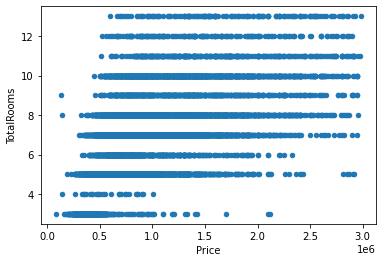

In [18]:
melbourne_data.plot (kind="scatter", x = 'Price', y= 'TotalRooms')

As you can see from the new scatterplot all outliers have been removed with the removal of 1000+ records from the data

Visualising Geographical Data

Using Longtittude and Latitude of each property to show location and then colouring the dot for each location to show the price

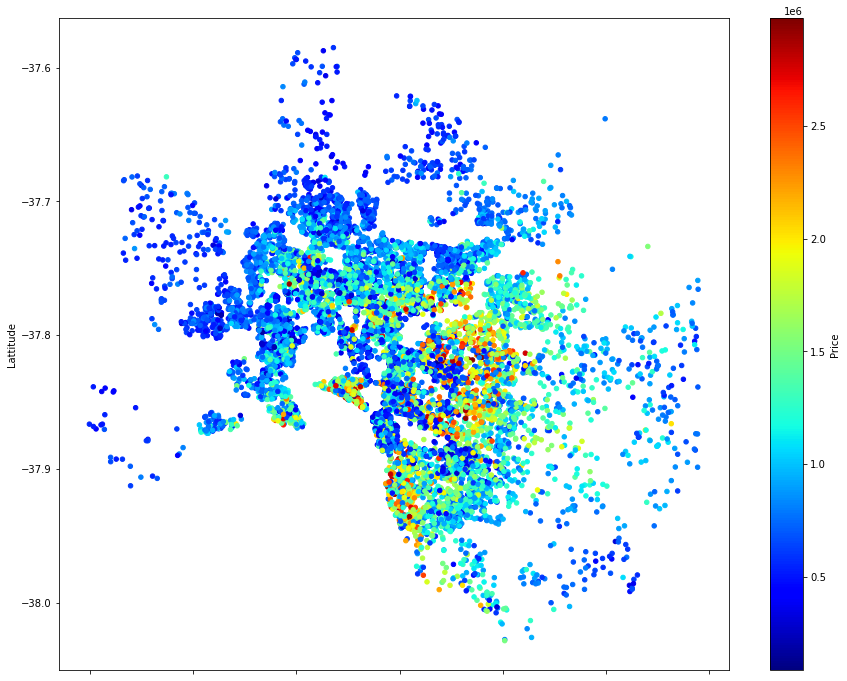

In [19]:
melbourne_data.plot(kind="scatter", x="Longtitude", y="Lattitude", c="Price", cmap=plt.get_cmap("jet"),
                    colorbar=True,figsize=(15,12))

It is advisable to try as many algorithms as possible to find the best one for the problem you are trying to solve. Once you have done this you can then fine tune your final slected model to achieve the best results possible. In the following we will use all of the attributes in the dataframe as this is only a relatively smal dataset. If you have hundreds of attributes you may wish to do more Feature Selection work before starting to model (see section below for more information on feature selection)
For more information on the models available within the scikit learn package and how they can be used see https://scikit-learn.org/stable/

Decision Tree Regressor model 

Data should be split into seperate training and test data.

Calculate the Mean Absolute Error

error = actual - predicted
Then the Mean is calculated from the error value from each prediction
"On average our predictions are off by about X....."

In [20]:
#Select the prediction target and store in y using dot notation
y = melbourne_data.Price

#Select all remaining attributes except for price and store in X
X = melbourne_data.drop('Price',1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Split the data into training and test sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
dtr_model = DecisionTreeRegressor()

# Fit model
dtr_model.fit(train_X, train_y)

DecisionTreeRegressor()

The text shown after initially training the model shows the default settings used. which ever model is selected these settings will be changed when fine tuning to achieve the best results

In cross-validation, we run the modeling process on different subsets of the data to get multiple measures of model quality.

In this example example, the data is divided into 5 pieces (folds), each 20% of the full dataset.

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

You can use this method for small datasets, where extra computational burden isn't a big deal.

For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

https://www.kaggle.com/alexisbcook/cross-validation

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict

predictions = cross_val_predict(dtr_model, X, y, cv=5)

scores = -1 * cross_val_score(dtr_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [264509.7486413  233380.4057971  235359.33288043 215180.47327899
 214630.19157609]


On average our predictions are off by about... (Average MAE scores across all experiments):
232612.03043478262


Cross-Predicted Accuracy: 58.087044851583 %


Random Forest Regressor model

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()

forest_model.fit(train_X, train_y)

RandomForestRegressor()

In [23]:
predictions = cross_val_predict(forest_model, X, y, cv=5)

scores = -1 * cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [190976.76793478 170431.65378623 174995.79245924 154915.1045788
 142924.49523551]


On average our predictions are off by about... (Average MAE scores across all experiments):
166848.76279891303


Cross-Predicted Accuracy: 78.4207032771034 %


LASSO model

In [24]:
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(train_X, train_y)

Lasso()

In [25]:
predictions = cross_val_predict(reg, X, y, cv=5)

scores = -1 * cross_val_score(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [244984.1263741  236543.74009316 227692.17026562 224409.31217014
 234854.69512704]


On average our predictions are off by about... (Average MAE scores across all experiments):
233696.80880601145


Cross-Predicted Accuracy: 63.652956330026456 %


KNeighbors Regressor model

In [26]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(train_X, train_y) 

KNeighborsRegressor()

In [27]:
predictions = cross_val_predict(neigh, X, y, cv=5)

scores = -1 * cross_val_score(neigh, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [276859.51938406 271350.14583333 260048.14085145 260507.50326087
 289491.79474638]


On average our predictions are off by about... (Average MAE scores across all experiments):
271651.42081521737


Cross-Predicted Accuracy: 44.20165715286129 %


Gradient Boosting Regressor model

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y) 

GradientBoostingRegressor()

In [29]:
predictions = cross_val_predict(gbr, X, y, cv=5)

scores = -1 * cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [195335.90447279 177956.31661851 179005.34037317 169287.38990443
 158641.46114791]


On average our predictions are off by about... (Average MAE scores across all experiments):
176045.28250336304


Cross-Predicted Accuracy: 77.02027634568067 %


Ridge CV model

In [30]:
from sklearn import linear_model

rcv = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
rcv.fit(train_X, train_y)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

In [31]:
predictions = cross_val_predict(rcv, X, y, cv=5)

scores = -1 * cross_val_score(rcv, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [244981.38427872 236581.03294559 227661.3693692  224432.6585598
 234929.89912089]


On average our predictions are off by about... (Average MAE scores across all experiments):
233717.26885484095


Cross-Predicted Accuracy: 63.64707325563326 %


Some model require the data in the dataframe to be scaled and there are various methods to do this. Scaling can also be used for modelling generally and can be a way to improve the accuracy of a model.

The SGD Regrssor model requires data in the dataframe to be scaled

MinMaxScaler
When your data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1.

StandardScaler
Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

See - https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/

In [32]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler().fit(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

scaledX = scaler.transform(X)

imputed_X = pd.DataFrame(scaledX)
imputed_X.head()
imputed_X.columns = X.columns

train_X, val_X, train_y, val_y = train_test_split(imputed_X, y, random_state = 0)

from sklearn import linear_model

clf = linear_model.SGDRegressor()
clf.fit(train_X, train_y)

SGDRegressor()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

scaledX = scaler.transform(X)

imputed_X = pd.DataFrame(scaledX)
imputed_X.head()
imputed_X.columns = X.columns

predictions = cross_val_predict(clf, imputed_X, y, cv=5)

scores = -1 * cross_val_score(clf, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [2.95796297e+16 1.90852779e+16 7.03053674e+15 1.87815850e+16
 4.34082647e+15]


On average our predictions are off by about... (Average MAE scores across all experiments):
1.5763571167349812e+16


Cross-Predicted Accuracy: 63.512197559246395 %


From these tests there are two models that perform very well with close scores, Random Forest Regressor and Gradient Boosting Regressor. I have selected to continue with the Gradient Boosting Regressor model as it achieved slightly better scores.

Feature Selection

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.
Irrelevant or partially relevant features can negatively impact model performance.

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.
Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

The benefits of performing feature selection before modeling your data: -
· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
· Improves Accuracy: Less misleading data means modeling accuracy improves.
· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features

In [34]:
#Select the prediction target and store in y using dot notation
feature_y = melbourne_data.Price

#Select all remaining attributes except for price and store in X
feature_x = melbourne_data.drop('Price',1)

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler When your data is comprised of attributes with varying scales, you can normalise and rescale into a range 
#of between 0 and 1.
X_norm = MinMaxScaler().fit_transform(feature_x)

X = X_norm   #independent columns
y = feature_y.iloc[0:,]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature_x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs        Score
2          Type  3296.890676
17    Date_Year  1010.776651
18   TotalRooms   615.694570
1         Rooms   586.694846
7      Bedroom2   565.787421
6      Postcode   474.984314
11  CouncilArea   443.374308
3        Method   399.446478
14   Regionname   351.551694
0        Suburb   346.379004


Feature Importance

To use this function you must have a working model that includes the feature_importances class.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

[0.01410398 0.02542338 0.23776396 0.00738089 0.01466174 0.14964629
 0.17233712 0.00897246 0.0080106  0.00950348 0.1061033  0.02509778
 0.03990818 0.05279594 0.00096352 0.01741808 0.0153645  0.00415691
 0.08474037 0.00564752]


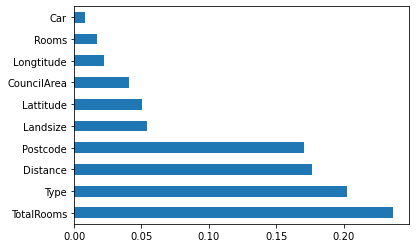

In [36]:
print(forest_model.feature_importances_) #use inbuilt class feature_importances
#plot graph of feature importances for better visualization
feat_importances = pd.Series(gbr.feature_importances_, index=feature_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
A heatmap makes it easier to identify which features are most related to the target variable, the following plots a heatmap of correlated features using the seaborn library.

The closer to 1 the higher the correlation

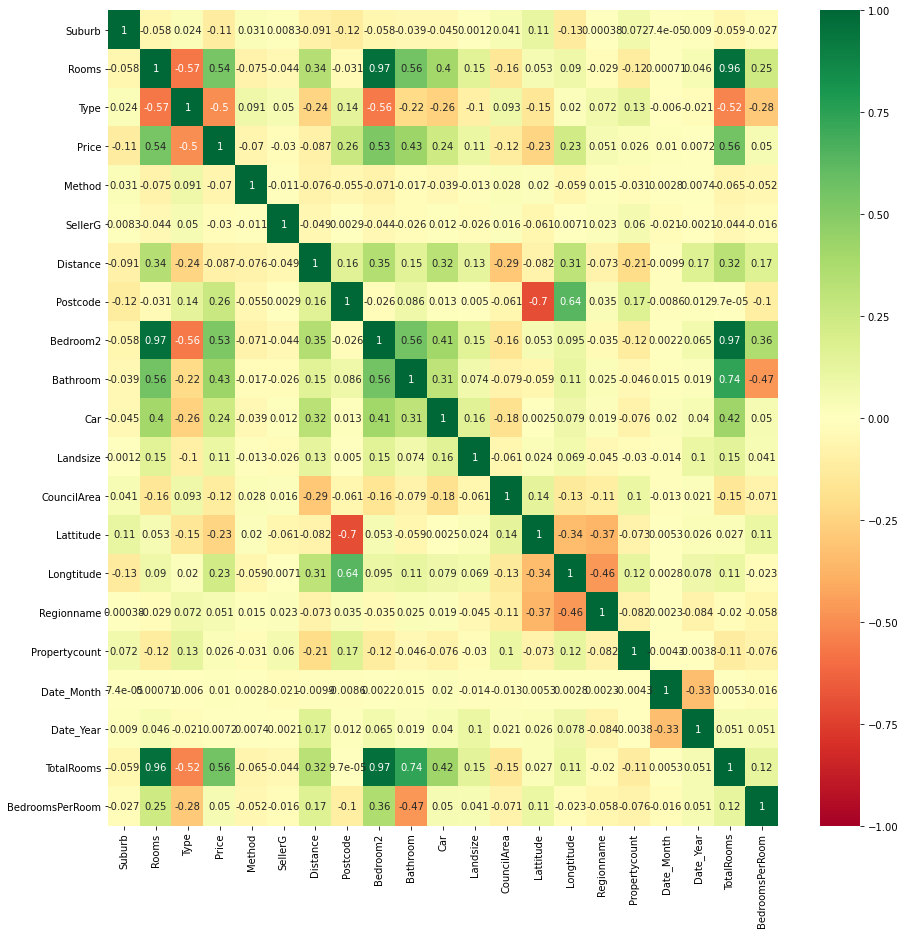

In [37]:
corr_matrix = melbourne_data.corr()

plt.figure (figsize=(15,15))
sns.heatmap(corr_matrix, cmap='RdYlGn', vmin=-1, annot=True)

The ten most correlated features (Not in order of correlation):
    Rooms
    Postcode
    Bedroom2
    Bathroom
    Car
    Landsize
    Longtitude
    TotalRooms
    Regionname
    BedroomsPerRoom

Each of these methods has given us a different list of features to use. We shall now try our model again only using those features to see which method is best in this particular case

Univariate

In [38]:
#Select the prediction target and store in y using dot notation
y = melbourne_data.Price

melbourne_features = {'Type', 'Date_Year', 'TotalRooms','Rooms','Bedroom2', 'Postcode','CouncilArea', 'Regionname', 
                      'Method', 'Suburb'}
X = melbourne_data[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model

gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y) 

GradientBoostingRegressor()

In [39]:
predictions = cross_val_predict(gbr, X, y, cv=5)

scores = -1 * cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [240859.86617932 223835.5605093  213195.1031579  205968.04773024
 221570.82548022]


On average our predictions are off by about... (Average MAE scores across all experiments):
221085.88061139584


Cross-Predicted Accuracy: 65.79607050358591 %


Feature

In [40]:
#Select the prediction target and store in y using dot notation
y = melbourne_data.Price

melbourne_features = {'TotalRooms', 'Type', 'Distance','Postcode','Landsize', 'Longtitude','Lattitude', 'CouncilArea', 
                      'Rooms', 'Car'}
X = melbourne_data[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y) 

GradientBoostingRegressor()

In [41]:
predictions = cross_val_predict(gbr, X, y, cv=5)

scores = -1 * cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [201062.40163383 177793.74539532 182331.2999396  169882.93162095
 156143.80959581]


On average our predictions are off by about... (Average MAE scores across all experiments):
177442.83763710255


Cross-Predicted Accuracy: 76.70043672629139 %


Correlation

In [42]:
#Select the prediction target and store in y using dot notation
y = melbourne_data.Price

melbourne_features = {'Rooms', 'Postcode', 'Bedroom2','Bathroom','Car', 'Landsize','Longtitude', 'TotalRooms', 
                      'Regionname', 'BedroomsPerRoom'}
X = melbourne_data[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
gbr = GradientBoostingRegressor()
gbr.fit(train_X, train_y) 

GradientBoostingRegressor()

In [43]:
predictions = cross_val_predict(gbr, X, y, cv=5)

scores = -1 * cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [233454.76595109 234583.23286731 215962.80360583 213800.80130518
 207427.48224403]


On average our predictions are off by about... (Average MAE scores across all experiments):
221045.8171946886


Cross-Predicted Accuracy: 65.56177672706771 %


Unsuprisingly The feature list from Feature Importance has given the best results as this comes from our selected model and so we will keep that list and continue to use it moving forward. Even though the accuracy is not as good as when the entire dataset was used, this could have been because of overfitting. 

Fine Tuning

Every model has parameters (settings) that can be changed to fine tune a models performance. So far we have used the algorithms default parameters as listed when fitting the model: -

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
                          
For more information on each of the parameters in an algorithm you should look at it's documentation (https://scikit-learn.org/stable/index.html - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

If we were to manually test combinations of each parameter this would take a significant amount of time, instead we can use GridSearchCV to test multiple combinations for us.

For this particlular model a good description of the methodology to use can be found in this article - https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [44]:
#Select the prediction target and store in y using dot notation
y = melbourne_data.Price

melbourne_features = {'TotalRooms', 'Type', 'Distance','Postcode','Landsize', 'Longtitude','Lattitude', 'CouncilArea', 
                      'Rooms', 'Car'}
X = melbourne_data[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
gbr = GradientBoostingRegressor(max_features = 'sqrt', max_depth = 9, min_samples_leaf = 9, n_estimators = 920, 
                                min_samples_split = 375, subsample = 0.9)
gbr.fit(train_X, train_y) 

GradientBoostingRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=9,
                          min_samples_split=375, n_estimators=920,
                          subsample=0.9)

In [45]:
#from sklearn.model_selection import GridSearchCV

#param_grid = [
#    {'subsample':[0.9,0.92,0.95]}
#]
#grid_search = GridSearchCV(gbr, param_grid,cv=5, scoring='neg_mean_absolute_error')
#grid_search.fit(X, y)
#grid_search.best_params_

In [46]:
predictions = cross_val_predict(gbr, X, y, cv=5)

scores = -1 * cross_val_score(gbr, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("\n")
print("On average our predictions are off by about... (Average MAE scores across all experiments):")
print(scores.mean())
print("\n")
accuracy = metrics.r2_score(y, predictions)*100
print ('Cross-Predicted Accuracy:', accuracy ,'%')

MAE scores:
 [184777.45521886 166951.11289815 167351.35174089 149109.36117353
 143129.14948846]


On average our predictions are off by about... (Average MAE scores across all experiments):
162263.6861039779


Cross-Predicted Accuracy: 80.31914302900553 %


The fine tuning has made a significant improvement in our model, results before were: -

Average MAE - 177353.2026083166
Cross-Predicted Accuracy: 76.71145520726157 %

After fine tuning: -

Average MAE - 163039.7085008508
Cross-Predicted Accuracy: 80.39619640697732 %

In [47]:
#Select the prediction target and store in y using dot notation
y = melbourne_data.Price

melbourne_features = {'TotalRooms', 'Type', 'Distance','Postcode','Landsize', 'Longtitude','Lattitude', 'CouncilArea', 
                      'Rooms', 'Car'}
X = melbourne_data[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
gbr = GradientBoostingRegressor(max_features = 'sqrt', max_depth = 9, min_samples_leaf = 9, n_estimators = 920, 
                                min_samples_split = 375, subsample = 0.9)
gbr.fit(train_X, train_y) 
predictions = gbr.predict(val_X)

In [48]:
# Below shows you how to save to a csv file your predictions along with the actual price
output = pd.DataFrame({'ActualPrice': val_y,
                       'PredictedPrice': predictions})

output.to_csv('submission.csv', index=False)

Explaining your model

Permutation Importance

In the same way that we used feature importance to find the best features to use for our model now that we have our final model we can see how this has changed and which attributes are now more significant.

https://www.kaggle.com/dansbecker/permutation-importance

To install eli5: -
    Download whl file from https://pypi.org/project/eli5/
    Copy file into root of C:\
    Open Anaconda Command Prompt and change directory - cd c:\
    Then install by typing - pip install filename.whl

In [49]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(gbr, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

In the output the values towards the top are the most important features, and those towards the bottom matter least.

The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).

Like most things in data science, there is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.

You'll occasionally see negative values for permutation importances. In those cases, the predictions on the shuffled (or noisy) data happened to be more accurate than the real data. This happens when the feature didn't matter (should have had an importance close to 0), but random chance caused the predictions on shuffled data to be more accurate. This is more common with small datasets because there is more room for luck/chance.

Partial dependence plots show how features affect predictions within the model.

https://github.com/SauceCat/PDPbox/blob/master/tutorials/pdpbox_regression.ipynb
https://www.kaggle.com/dansbecker/partial-plots

To install module: -
    Open Anaconda Command Prompt
    Type - pip install pdpbox

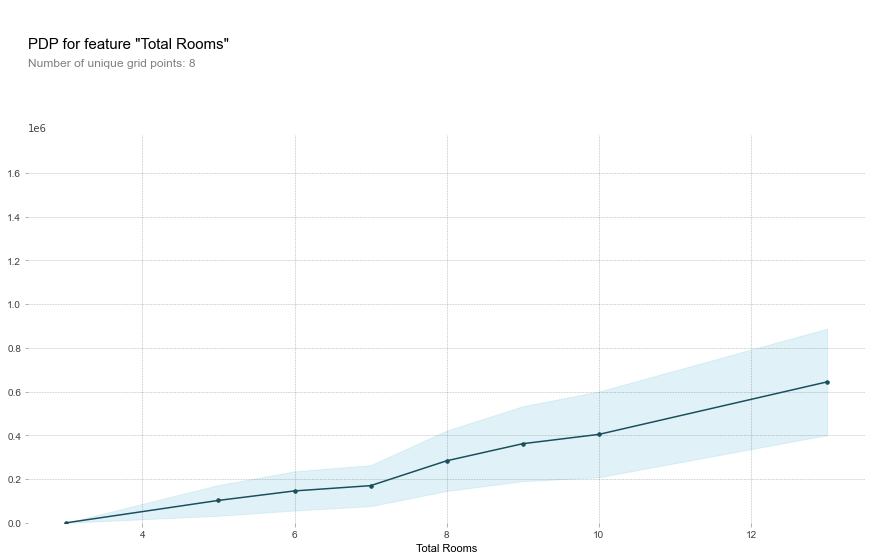

In [50]:
import pdpbox
from pdpbox import pdp

# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=gbr, dataset=val_X, model_features=melbourne_features, feature='TotalRooms')

# plot it
pdp.pdp_plot(pdp_graph, 'Total Rooms')
plt.show()

The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.
A blue shaded area indicates level of confidence

From this graph you can see, as expected, that the Total number of Rooms in a property increases the predicted value of a house

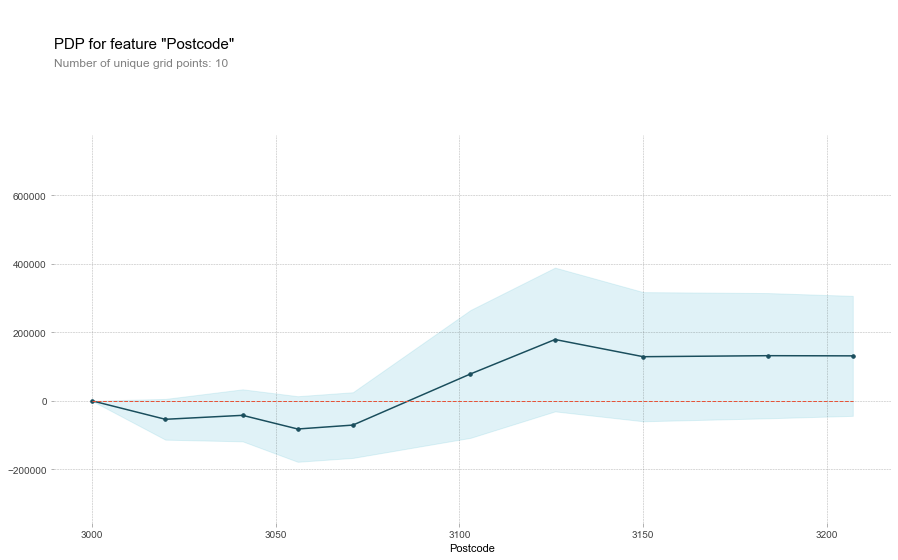

In [51]:
# Create the data that we will plot
pdp_graph = pdp.pdp_isolate(model=gbr, dataset=val_X, model_features=melbourne_features, feature='Postcode')

# plot it
pdp.pdp_plot(pdp_graph, 'Postcode')
plt.show()

In this graph you can see that some postcodes have a negative affect where others are positive.

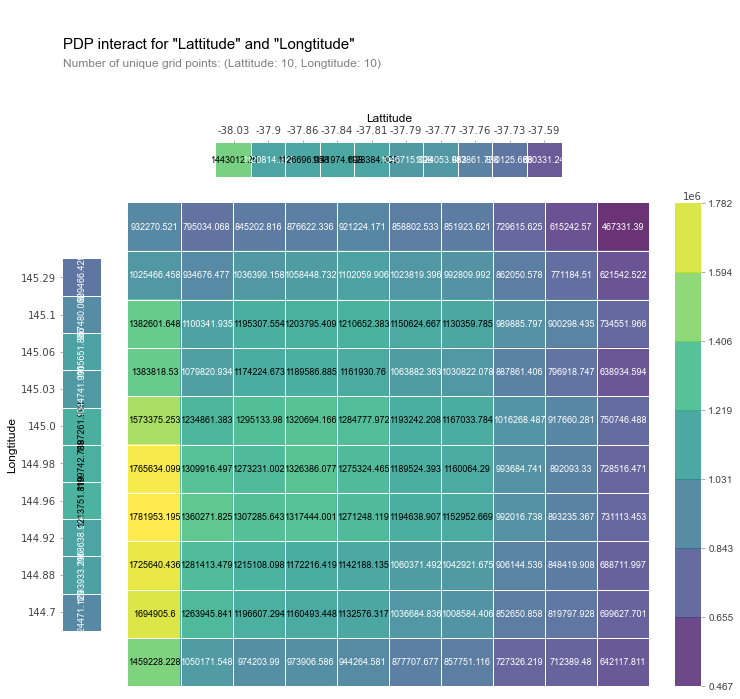

In [52]:
features_to_plot = ['Lattitude', 'Longtitude']
inter1  =  pdp.pdp_interact(model=gbr, dataset=val_X, model_features=melbourne_features, features=features_to_plot)

fig, axes = pdp.pdp_interact_plot(inter1, feature_names=features_to_plot, x_quantile=True, plot_type='grid', plot_pdp=True)


This grid shows the effects of Lattitude and Longtitude on a house price